In [78]:
## IMPORT ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
# LOAD DATA #
csv_path = "file:///Users/muzo/Python for Data Analysis/tripadvisor_in-restaurant_sample2.csv"

col_names = ["Restaurant ID", "Restaurant URL", "Name", "Address",
         "Phone", "City", "State", "Country", "Neighbourhood",
         "Email ID", "Menu", "Website", "Latitude", "Longitude",
         "About Restaurant", "Cuisine", "Good for(suitable)",
         "Price", "Currency", "Rating", "Ranking", "IndividualRanking", "TotalCategory", "Deal(Promotion)",
         "Total Review", "Last Reviewed", "Recommended",
         "Dining Option", "Award", "Uniq Id"]

In [80]:
restaurants = pd.read_csv(csv_path, names=col_names, skiprows=lambda x: x == 0)

In [81]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 30 columns):
Restaurant ID         18000 non-null object
Restaurant URL        17994 non-null object
Name                  17991 non-null object
Address               17978 non-null object
Phone                 15566 non-null object
City                  17004 non-null object
State                 17993 non-null object
Country               17996 non-null object
Neighbourhood         650 non-null object
Email ID              858 non-null object
Menu                  0 non-null float64
Website               8576 non-null object
Latitude              17442 non-null float64
Longitude             17442 non-null float64
About Restaurant      937 non-null object
Cuisine               7553 non-null object
Good for(suitable)    1199 non-null object
Price                 1704 non-null object
Currency              1701 non-null object
Rating                8 non-null object
Ranking               10133

In [82]:
restaurants.head(2)

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Ranking,IndividualRanking,TotalCategory,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
0,1345154,http://www.tripadvisor.in/Restaurant_Review-g1...,Gaststatte Gunter Jung,"Hintergasse 38, 61231 Bad Nauheim, Hesse, Germany",+49 6032 81796,Bad Nauheim,Hesse,Germany,NaN,NaN,...,40 of 61,40.0,61.0,NaN,030c4d068d2d59518db5de6ebb9ecdd6,NaN,NaN,NaN,NaN,NaN
1,5818482,http://www.tripadvisor.in/Restaurant_Review-g1...,TurQuaz Shisha Lounge & Thorizzio da Bambi Lie...,"Frankfurter Strasse 49, 63571 Gelnhausen, Hess...",06051 8877462,Gelnhausen,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,6e160a28f7d9beeee848a35bd947477c,NaN,NaN,NaN,NaN,NaN


In [83]:
restaurants.Name.unique()

array(['Gaststatte Gunter Jung',
       'TurQuaz Shisha Lounge & Thorizzio da Bambi Lieferservice',
       'Zum Schrebergarten', ..., 'The Hollybank Restaurant', 'TART',
       'Belfords Pizzas'], dtype=object)

In [84]:
restaurants.Address.unique()

array(['Hintergasse 38, 61231 Bad Nauheim, Hesse, Germany',
       'Frankfurter Strasse 49, 63571 Gelnhausen, Hesse, Germany',
       'Lampertheimer Str. 90, Viernheim, Hesse, Germany', ...,
       '58 Glasgow Road , St. Ninians | Stirling, Stirling FK7 0PH, Scotland',
       '344 Ladbroke Grove, London W10 5BU, England',
       '76 Main Av, London EN1 1DH, England'], dtype=object)

In [85]:
restaurants.Phone.unique()

array(['+49 6032 81796', '06051 8877462', '06204-72892', ...,
       '01786 812311', '7747723812', '020 8363 6734'], dtype=object)

In [86]:
restaurants.City.unique()

array(['Bad Nauheim', 'Gelnhausen', 'Viernheim', ..., 'Milngavie',
       'Doune', 'Balmore'], dtype=object)

In [87]:
restaurants.State.unique() #some "states" are actually provinces and others are actually countries.

array(['Hesse', 'Thuringia', 'North Rhine-Westphalia',
       'Baden-Wurttemberg', 'Saxony-Anhalt', 'Rhineland-Palatinate',
       'Bavaria', 'Brandenburg', 'Lower Saxony', 'Berlin', 'Saxony', 'MA',
       'RI', nan, 'NH', 'Woburn', 'State of Goias',
       'State of Rio de Janeiro', 'State of Minas Gerais',
       'State of Mato Grosso', 'State of Mato Grosso do Sul',
       'State of Tocantins', 'MN', 'SD', 'CO', 'IA', 'ND', 'WI', 'NE',
       'Ontario', 'Mitchell', 'Platte', 'Central Argentina', 'Lutsen',
       'Manitoba', 'Effretikon', 'Alsace', 'Canton of Thurgau', 'Riehen',
       'Schaffhausen', 'Glattfelden', 'Basel', 'Mumliswil', 'Wil',
       'Austrian Alps', 'Thayngen', 'Canton of Aargau', 'Birsfelden',
       'Eglisau', 'Lorraine', 'Muttenz', 'AR', 'LA', 'OK', 'MI', 'TX',
       'Harrison', 'MS', 'MO', 'TN', 'CT', 'OH', 'ME', 'AL', 'FL',
       'Quebec', 'GA', 'New Brunswick', 'Birmingham', 'CA', 'OR', 'WA',
       'British Columbia', 'ID', 'White Salmon', 'Gainesville',
 

In [88]:
restaurants.Country.unique() # Africa and Europe are not countries

array(['Germany', 'United States', nan, 'Brazil', 'Canada',
       'South America', 'Switzerland', 'France', 'Austria', 'Africa',
       'Mexico', 'Scotland', 'England', 'Europe', 'Wales'], dtype=object)

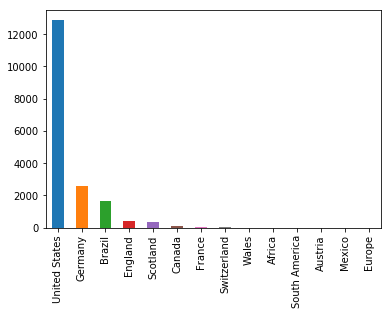

In [89]:
restaurants.Country.value_counts().plot(kind='bar')
# Most of the restaurants are in the US (over 12,000) so it may be better to only consider
# that subset for the analysis.

In [90]:
restaurants.Neighbourhood.unique()

array([nan, 'Altstadt', 'Bockenheim', 'Innenstadt', 'Sachsenhausen-Nord',
       'Bahnhofsviertel', 'H\x92_chst', 'Ostviertel',
       'Sachsenhausen-S\x92_d', 'Stadtkern', 'Bornheim',
       'S\x92_dliche Innenstadt', 'Niederrad', 'Downtown',
       'Allston / Brighton', 'Dorchester / Roxbury / Mattapan',
       'North End', 'Back Bay', 'South Boston',
       'West Roxbury / Hyde Park / Roslindale', 'Charlestown',
       'East Boston / Logan Airport', 'Beacon Hill',
       'Jamaica Plain / Mission Hill', 'South End', 'Fenway / Kenmore',
       'Centro', 'Copacabana', 'Barra da Tijuca', 'Santa Teresa', 'Lagoa',
       'Ipanema', 'Santo Cristo', 'Botafogo', 'Flamengo',
       'Jardim Bot\x92\xa2nico', 'Santa Cruz', 'Innenstadt-West',
       'S\x92_dweststadt', 'Durlach', 'Krutenau Nord Ouest',
       'S\x92_dstadt', 'Innenstadt-Ost', 'St. Alban', 'Wangen',
       'Upper South Providence', 'Downtown Providence', 'Smith Hill',
       'Federal Hill', 'College Hill', 'Central L.A',
       '

In [91]:
restaurants.Website.unique()

array([nan, 'http://www.zum-gruenen-wald.com/de/index.pmode',
       'http://www.pizzeria-carlo.de/', ...,
       'http://123-reg-expired.co.uk/', 'http://www.capolanda.com',
       'http://www.thehollybank.co.uk/'], dtype=object)

In [92]:
restaurants.Cuisine.unique()

array([nan, 'European, French, Mediterranean, Wine Bar', 'Italian', ...,
       'Dessert, English, Indian, Vegetarian, Bangladeshi',
       'Indian, Pakistani, Fast food, Halal',
       'Dessert, Scottish, British, Family Fare'], dtype=object)

In [93]:
restaurants.Rating.unique()

array([nan, '50 out of 50', '45 out of 50', '40 out of 50'], dtype=object)

In [94]:
restaurants.Ranking.unique() # About 10,000 records have data for this variable. Will drop all the NAN in this column.

array(['40 of 61', nan, '24 of 53', ..., '12,558 of 16,892',
       '4,644 of 16,899', '298 of 1,722'], dtype=object)

In [95]:
restaurants.Recommended.unique()

array([nan])

In [96]:
restaurants.Award.unique()

array([nan])

In [97]:
restaurants.columns[restaurants.dtypes==float]

Index([u'Menu', u'Latitude', u'Longitude', u'IndividualRanking',
       u'TotalCategory', u'Last Reviewed', u'Recommended', u'Dining Option',
       u'Award', u'Uniq Id'],
      dtype='object')

In [98]:
subset_restaurants = restaurants.loc[restaurants['Country'] == 'United States']

In [99]:
subset_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12851 entries, 1414 to 17207
Data columns (total 30 columns):
Restaurant ID         12851 non-null object
Restaurant URL        12851 non-null object
Name                  12851 non-null object
Address               12839 non-null object
Phone                 11976 non-null object
City                  12756 non-null object
State                 12849 non-null object
Country               12851 non-null object
Neighbourhood         417 non-null object
Email ID              608 non-null object
Menu                  0 non-null float64
Website               6638 non-null object
Latitude              12792 non-null float64
Longitude             12792 non-null float64
About Restaurant      737 non-null object
Cuisine               5400 non-null object
Good for(suitable)    965 non-null object
Price                 1437 non-null object
Currency              1436 non-null object
Rating                8 non-null object
Ranking               734

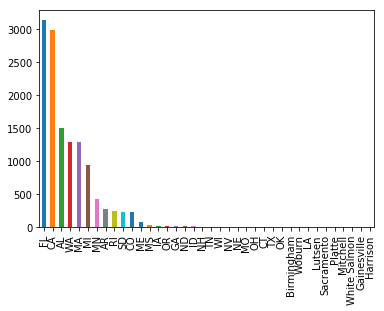

In [103]:
subset_restaurants.State.value_counts().plot(kind='bar')
# The majority of the restaurant data from the US came from Florida and California.

In [52]:
subset_restaurants.State.unique() # 9 records list cities as states

array(['MA', 'RI', 'NH', 'Woburn', 'MN', 'SD', 'CO', 'IA', 'ND', 'WI',
       'NE', 'Mitchell', 'Platte', 'Lutsen', 'AR', nan, 'LA', 'OK', 'MI',
       'TX', 'Harrison', 'MS', 'MO', 'TN', 'CT', 'OH', 'ME', 'AL', 'FL',
       'GA', 'Birmingham', 'CA', 'OR', 'WA', 'ID', 'White Salmon',
       'Gainesville', 'NV', 'Sacramento'], dtype=object)

In [53]:
# split Ranking column into individual cells using space as the delimiter in ms excel
subset_restaurants.TotalCategory.unique()

array([nan, '275', '2,797', '170', '238', '509', '5', '44', '61', '537',
       '36', '71', '211', '27', '50', '15', '221', '117', '182', '3',
       '137', '14', '68', '76', '103', '26', '64', '4', '100', '310',
       '56', '39', '79', '217', '47', '49', '249', '48', '43', '29', '60',
       '20', '99', '146', '35', '19', '34', '51', '722', '121', '12',
       '10', '174', '16', '28', '80', '144', '21', '24', '22', '54', '37',
       '106', '23', '124', '201', '111', '11', '52', '42', '1', '73',
       '87', '45', '41', '33', '17', '120', '83', '145', '70', '460',
       '368', '46', '2', '225', '63', '131', '323', '30', '84', '18',
       '65', '118', '220', '55', '9', '13', '1,569', '183', '66', '784',
       '8', '58', '6', '129', '7', '244', '69', '199', '62', '78', '32',
       '38', '86', '53', '25', '133', '31', '72', '115', '665', '77',
       '311', '85', '196', '167', '75', '186', '226', '130', '162', '57',
       '59', '82', '308', '90', '210', '127', '101', '231', '1,262'

In [72]:
# Find any missing data
subset_restaurants.loc[subset_restaurants.isnull().any(axis=1),:].shape

(12851, 30)

In [75]:
test_nona = subset_restaurants.dropna(axis=0) 
# this line of code erased all the data. Not sure what the fix here would be so I 
# did not use it.

In [76]:
test_nona.info() # This showed that all data erased in line 61.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
Restaurant ID         0 non-null object
Restaurant URL        0 non-null object
Name                  0 non-null object
Address               0 non-null object
Phone                 0 non-null object
City                  0 non-null object
State                 0 non-null object
Country               0 non-null object
Neighbourhood         0 non-null object
Email ID              0 non-null object
Menu                  0 non-null float64
Website               0 non-null object
Latitude              0 non-null float64
Longitude             0 non-null float64
About Restaurant      0 non-null object
Cuisine               0 non-null object
Good for(suitable)    0 non-null object
Price                 0 non-null object
Currency              0 non-null object
Rating                0 non-null object
Ranking               0 non-null object
IndividualRanking     0 non-null object
TotalCategory         0 

<div class="alert alert-block alert-info">
After splitting the Ranking column into two variables IndividualRank and TotalCategory
you can see that when you look at the max number of restaurants reviewed for each state (TotalCategory) they are all located in the same city for any particular state. 

There is a lot of missing data in the dataset and some restaurants did not get compared to many other restaurants within their own categories. To meet this discrepancy in the data I only looked at restaurants that had been compared to at least 100 other restaurants in their category. This left me with data from 18 US states to compare restaurants' ranks.
</div>

In [117]:
subrest_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5023 entries, 1417 to 17205
Data columns (total 30 columns):
Restaurant ID         5023 non-null object
Restaurant URL        5023 non-null object
Name                  5023 non-null object
Address               5023 non-null object
Phone                 4622 non-null object
City                  4980 non-null object
State                 5023 non-null object
Country               5023 non-null object
Neighbourhood         343 non-null object
Email ID              409 non-null object
Menu                  0 non-null float64
Website               2836 non-null object
Latitude              5010 non-null float64
Longitude             5010 non-null float64
About Restaurant      476 non-null object
Cuisine               3278 non-null object
Good for(suitable)    701 non-null object
Price                 1061 non-null object
Currency              1060 non-null object
Rating                0 non-null object
Ranking               5023 non-null 

In [118]:
subrest_filtered.State.unique()

array(['RI', 'MA', 'NH', 'MN', 'CO', 'SD', 'IA', 'ND', 'AR', 'MI', 'MO',
       'TX', 'TN', 'OH', 'AL', 'ME', 'MS', 'FL', 'GA', 'CA', 'WA', 'OR'],
      dtype=object)

In [120]:
subrest_filtered.head(2)

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Ranking,IndividualRanking,TotalCategory,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
1417,833989,http://www.tripadvisor.in/Restaurant_Review-g5...,Ronzio Pizza,"422 Warwick Ave, Warwick, RI 02888-1338",401-941-7750,Warwick,RI,United States,NaN,NaN,...,154 of 275,154.0,275.0,NaN,2793e640344081efb85a13fa157315a8,NaN,NaN,NaN,NaN,NaN
1420,1830226,http://www.tripadvisor.in/Restaurant_Review-g6...,Finagle-A-Bagel,"129 Tremont St, Boston, MA 02135",(617) 426-3300,Boston,MA,United States,Allston / Brighton,NaN,...,"1,532 of 2,797",1532.0,2797.0,NaN,80f89feb3aeefafa33cf60dc2ab6297d,NaN,NaN,NaN,NaN,NaN


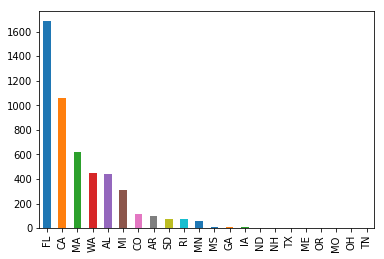

In [119]:
subrest_filtered.State.value_counts().plot(kind='bar')

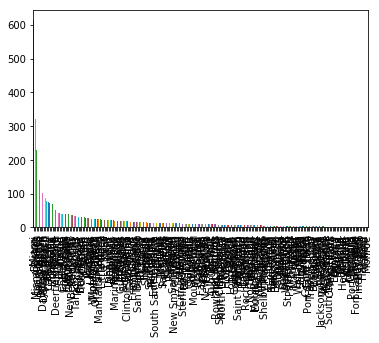

In [121]:
subrest_filtered.City.value_counts().plot(kind='bar')

In [127]:
subrest_filtered2 = subrest_filtered.query('IndividualRanking == 1')

In [128]:
subrest_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1920 to 16874
Data columns (total 30 columns):
Restaurant ID         35 non-null object
Restaurant URL        35 non-null object
Name                  35 non-null object
Address               35 non-null object
Phone                 35 non-null object
City                  35 non-null object
State                 35 non-null object
Country               35 non-null object
Neighbourhood         0 non-null object
Email ID              8 non-null object
Menu                  0 non-null float64
Website               23 non-null object
Latitude              35 non-null float64
Longitude             35 non-null float64
About Restaurant      6 non-null object
Cuisine               32 non-null object
Good for(suitable)    8 non-null object
Price                 10 non-null object
Currency              10 non-null object
Rating                0 non-null object
Ranking               35 non-null object
IndividualRanking     35 non-null

<div class="alert alert-block alert-info">
From here, we have 35 cities that had restuarants that were compared to at least 100 other 
restaurants in their category and received a ranking of 1. I placed more weight on
cities with a larger pool of restaurants used in each comparison (TotalCategory).
</div>

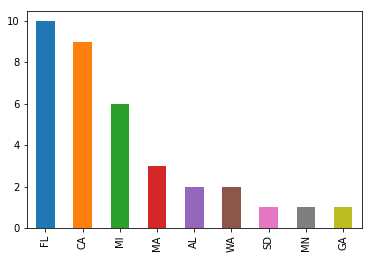

In [138]:
subrest_filtered2.State.value_counts().plot(kind='bar')
# Number of restaurants with #1 rank. FL had 10 restaurants with a Rank of #1 based on different categories.

In [142]:
subrest_filtered2.head(35)

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Ranking,IndividualRanking,TotalCategory,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
1920,4380157,http://www.tripadvisor.in/Restaurant_Review-g6...,Tavern on the Green,"18 Washington Square W, Hawthorne Hotel, Salem...",(978) 744-4080,Salem,MA,United States,NaN,NaN,...,1 of 211,1.0,211.0,NaN,32686dff2fcab9e00072d6dd25d23557,NaN,NaN,NaN,NaN,NaN
2084,384516,http://www.tripadvisor.in/Restaurant_Review-g6...,Punjab Cafe,"653 Southern Artery, Quincy, MA 02169-5645",617-472-4860,Quincy,MA,United States,NaN,NaN,...,1 of 249,1.0,249.0,NaN,103ab664a21dbeb2284db1e5c1e088b9,NaN,NaN,NaN,NaN,NaN
2128,1463012,http://www.tripadvisor.in/Restaurant_Review-g4...,Blue Blinds Bakery,"7 North St, Plymouth, MA 02360-3309",508-747-0462,Plymouth,MA,United States,NaN,NaN,...,1 of 174,1.0,174.0,Certificate of Excellence 2014,657189117464bd2a58474b78f45143c4,NaN,NaN,NaN,NaN,NaN
4470,1073018,http://www.tripadvisor.in/Restaurant_Review-g4...,Pagliai's Pizza,"524 South Front Street, Mankato, MN 56001",5073877274,Mankato,MN,United States,NaN,NaN,...,1 of 120,1.0,120.0,NaN,470a6af04088356e80aa3a39794a0ffd,NaN,NaN,NaN,NaN,NaN
4763,4209988,http://www.tripadvisor.in/Restaurant_Review-g5...,Jacky's Restaurant and Bakery,"702 E 8th St, Sioux Falls, SD 57103",(605) 336-0588,Sioux Falls,SD,United States,NaN,NaN,...,1 of 323,1.0,323.0,NaN,c17c319508ff0d4b21366b422abbb83a,NaN,NaN,NaN,NaN,NaN
6962,390116,http://www.tripadvisor.in/Restaurant_Review-g4...,Antoniou's Pizza,"918 S Rochester Rd, Rochester Hills, MI 48307-...",(248) 650-2200,Rochester Hills,MI,United States,NaN,NaN,...,1 of 111,1.0,111.0,NaN,4081173b4e76405474b91f752c725729,NaN,NaN,NaN,NaN,NaN
7287,822015,http://www.tripadvisor.in/Restaurant_Review-g4...,Intermission Deli,"2128 Bay St, Saginaw, MI 48602-3909",989-790-6777,Saginaw,MI,United States,NaN,NaN,...,1 of 245,1.0,245.0,NaN,603bf6356b87e0600a8f268879e1762d,NaN,NaN,NaN,NaN,NaN
7420,389772,http://www.tripadvisor.in/Restaurant_Review-g4...,Sahara Restaurant,"22114 Harper Ave, Saint Clair Shores, MI 48080...",586-777-9600,Saint Clair Shores,MI,United States,NaN,NaN,...,1 of 112,1.0,112.0,NaN,3845171eef671e1f333970647a799a13,NaN,NaN,NaN,NaN,NaN
7481,808865,http://www.tripadvisor.in/Restaurant_Review-g2...,Buddy's Pizza,"2612 North Squirrel Road, Auburn Hills, MI 48326",248-276-9040,Auburn Hills,MI,United States,NaN,NaN,...,1 of 119,1.0,119.0,Certificate of Excellence 2014,875dc035d6d168cd197b42df5498677d,NaN,NaN,NaN,NaN,NaN
7614,2366436,http://www.tripadvisor.in/Restaurant_Review-g4...,La Marsa Mediterranean Cuisine,"543 West Grand River, Brighton, MI",(810) 227-0600,Brighton,MI,United States,NaN,NaN,...,1 of 108,1.0,108.0,Certificate of Excellence 2014,c43109e5bc4620b1b7e94b73903b0f7b,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
Based on this data, the restaurant with the highest ranking from the pool of restaurants in the data is an Italian restaurant in Miami, FL called VERO Italian.
</div>